# StatsModelsとScikit-learnの比較

In [2]:
#### データの読み込み
import pandas as pd

file = 'data/1_test_reg.csv'
df = pd.read_csv(file)

In [4]:
### 各データの相関を調べる
df.corr()

,Earn,MaxTemp,MinTemp,Humi,Wind,Sun
Earn,1.000000,0.958292,0.946677,0.827957,-0.018816,0.915327
MaxTemp,0.958292,1.000000,0.985581,0.886131,-0.081484,0.962223
MinTemp,0.946677,0.985581,1.000000,0.892770,-0.089977,0.961236
Humi,0.827957,0.886131,0.892770,1.000000,-0.196722,0.888886
Wind,-0.018816,-0.081484,-0.089977,-0.196722,1.000000,-0.112774
Sun,0.915327,0.962223,0.961236,0.888886,-0.112774,1.000000


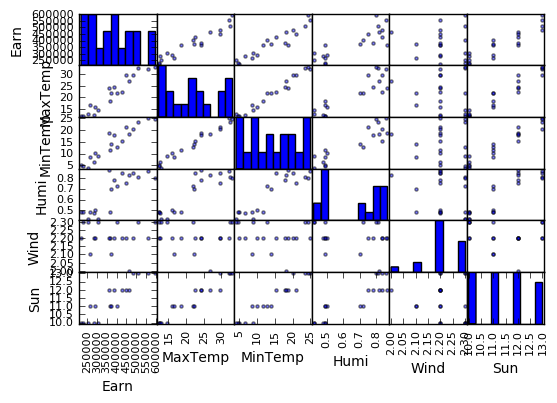

In [5]:
# 各相関を描画する
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

## StatsModelsでLasso回帰

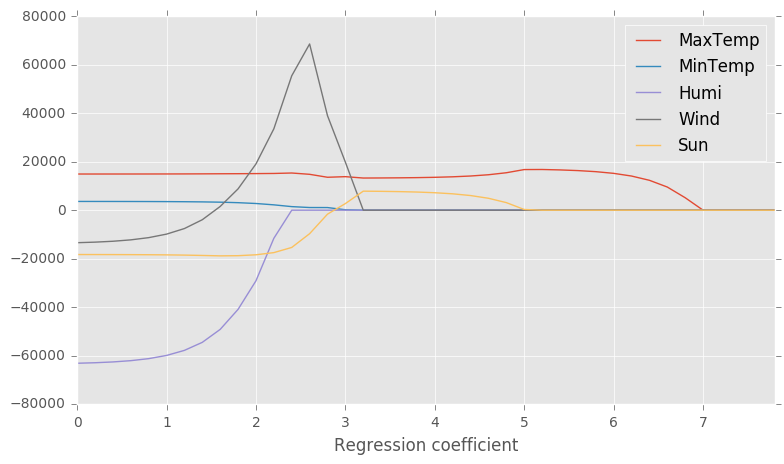

In [36]:
### 回帰分析
import statsmodels.api as sm

# 変数の定義
X = df.loc[:,['MaxTemp','MinTemp','Humi','Wind','Sun']]
Y = df['Earn']

# モデルの生成
model = sm.OLS(Y, sm.add_constant(X))

# アルファの値を振ってみる
import math
alpha_list = [10 ** (i / 5.0) for i in range(40)]
b = pd.DataFrame() # 回帰係数を格納するデータフレーム

# 解パス図を作成するためにアルファの値を振りながら回帰係数を求める
for alpha_v in alpha_list:

    result = model.fit_regularized(
                        method='elastic_net',
                        alpha=alpha_v,
                        L1_wt=1.0,
                        start_params=None,
                        profile_scale=False,
                        refit=False
                        )

    # 回帰分析を実行する
    b=pd.concat([b,result.params.T],axis=1)
    
### 描画
plt.style.use('ggplot') # ggplotを使う
font = {'family' : 'meiryo'} # フォントをメイリオにする

# 回帰係数のデータフレームにアルファの値を対応付ける

b.columns=[math.log10(i) for i in alpha_list]  # 描画のために列名を変える

b.T.loc[:,['MaxTemp','MinTemp','Humi','Wind','Sun']].plot(figsize=(9, 5))
plt.legend()
plt.xlabel("Alpha [log10]")
plt.xlabel("Regression coefficient")
plt.show()

## Scikit-learnでLasso回帰

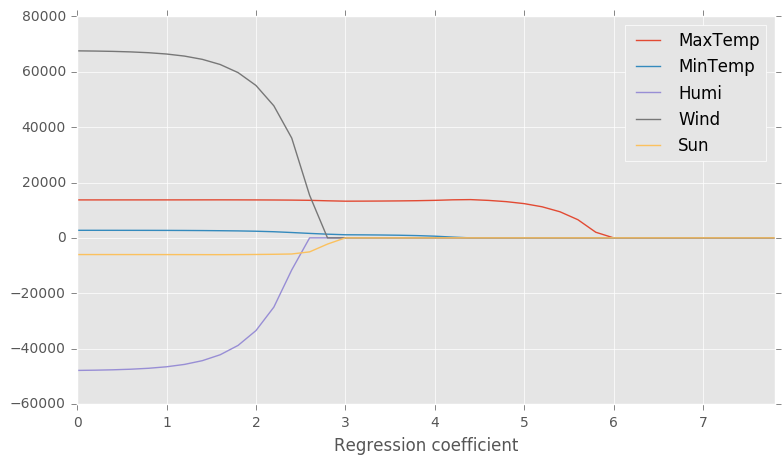

In [29]:
from sklearn import cross_validation, preprocessing, linear_model #機械学習用のライブラリを利用
import sklearn

X = df.loc[:,['MaxTemp','MinTemp','Humi','Wind','Sun']].as_matrix()
Y = df['Earn'].as_matrix()

# アルファの値を振ってみる
alpha_list = [10 ** (i / 5.0) for i in range(40)]
b = pd.DataFrame() # 回帰係数を格納するデータフレーム

# 解パス図を作成するためにアルファの値を振りながら回帰係数を求める
for alpha_v in alpha_list:
    clf_EN= linear_model.ElasticNet(alpha=alpha_v, l1_ratio=1.0)
    clf_EN.fit(X, Y)

    #b=pd.concat([b,result.params.T],axis=1)

    #print(clf_EN.intercept_)

    #print(clf_EN.coef_)
    b=pd.concat([b,pd.DataFrame(clf_EN.coef_)],axis=1)
### 描画
plt.style.use('ggplot') # ggplotを使う
font = {'family' : 'meiryo'} # フォントをメイリオにする

b.index=['MaxTemp','MinTemp','Humi','Wind','Sun'] # 描画のために行名を変える
b.columns=[math.log10(i) for i in alpha_list]  # 描画のために列名を変える
#print (b.T)

b.T.plot(figsize=(9, 5))
plt.legend()
plt.xlabel("Alpha [log10]")
plt.xlabel("Regression coefficient")
plt.show()